### Question 3 Python
Housing

Step 1. Import the necessary libraries

Step 2. Create 3 differents Series, each of length 100, as follows:

• The first a random number from 1 to 4

• The second a random number from 1 to 3

• The third a random number from 10,000 to 30,000

Step 3. Create a DataFrame by joinning the Series by column

Step 4. Change the name of the columns to bedrs, bathrs, price_sqr_meter

Step 5. Create a one column DataFrame with the values of the 3 Series and assign it to 'bigcolumn'

Step 6. Ops it seems it is going only until index 99. Is it true?

Step 7. Reindex the DataFrame so it goes from 0 to 299

In [2]:
#Step 1. Import the necessary libraries
import pandas as pd
import numpy as np

In [3]:
#Step 2. Create 3 differents Series, each of length 100, as follows:
#• The first a random number from 1 to 4
#• The second a random number from 1 to 3
#• The third a random number from 10,000 to 30,000

series1 = pd.Series(np.random.randint(1, high=5, size=100, dtype='l'))     #defining series 1,2, and 3
series2 = pd.Series(np.random.randint(1, high=4, size=100, dtype='l'))
series3 = pd.Series(np.random.randint(10000, high=30001, size=100, dtype='l'))

print ("series1 is =", series1)    #printing series 1,2, and 3
print ("series 2 is =", series2)
print("series 3 ia =", series3)

series1 is = 0     4
1     4
2     3
3     2
4     2
     ..
95    2
96    1
97    3
98    2
99    4
Length: 100, dtype: int32
series 2 is = 0     2
1     1
2     3
3     3
4     1
     ..
95    2
96    1
97    2
98    2
99    2
Length: 100, dtype: int32
series 3 ia = 0     10604
1     25485
2     11893
3     22715
4     24149
      ...  
95    10892
96    17705
97    26034
98    16230
99    14289
Length: 100, dtype: int32


In [4]:
#Step 3. Create a DataFrame by joinning the Series by column

data_frame = pd.concat([series1, series2, series3], axis=1)   #joining 1,2, and 3 series
print(data_frame)

    0  1      2
0   4  2  10604
1   4  1  25485
2   3  3  11893
3   2  3  22715
4   2  1  24149
.. .. ..    ...
95  2  2  10892
96  1  1  17705
97  3  2  26034
98  2  2  16230
99  4  2  14289

[100 rows x 3 columns]


In [5]:
#Step 4. Change the name of the columns to bedrs, bathrs, price_sqr_meter
data_frame.columns = ['bedrs','bathrs','price_sqr_meter']
data_frame.head()

,bedrs,bathrs,price_sqr_meter
0,4,2,10604
1,4,1,25485
2,3,3,11893
3,2,3,22715
4,2,1,24149


In [6]:
#Step 5. Create a one column DataFrame with the values of the 3 Series and assign it to 'bigcolumn'

# join concat the values
column = pd.concat([series1, series2, series3], axis=0)

# it is still a Series, so we need to transform it to a DataFrame
column = column.to_frame()
print (column)
 
column

        0
0       4
1       4
2       3
3       2
4       2
..    ...
95  10892
96  17705
97  26034
98  16230
99  14289

[300 rows x 1 columns]


,0
0,4
1,4
2,3
3,2
4,2
...,...
95,10892
96,17705
97,26034
98,16230


In [7]:
#Step 6. Ops it seems it is going only until index 99. Is it true?

if (max(column.index)==99):
    print('True')
else:
    print('False')

True


In [8]:
#Step 7. Reindex the DataFrame so it goes from 0 to 299

new_index=[x for x in range(0,300)]
column = pd.concat([series1, series2, series3], axis=0,ignore_index=True)
column = column.to_frame()
column=column.reindex(new_index)
print("column is") 
column

column is


,0
0,4
1,4
2,3
3,2
4,2
...,...
295,10892
296,17705
297,26034
298,16230


### Question 4 
Wind Statistics
The data have been modified to contain some missing values, identified by NaN.
Using pandas should make this exercise easier, in particular for the bonus question.
 BDAT 1004 – Data Programming
Page 5 of 7
F2020
BDAT 1004 Computer Studies
You should be able to perform all of these operations without using a for loop or
other looping construct.
The data in 'wind.data' has the following format:

Yr Mo Dy RPT VAL ROS KIL SHA BIR DUB CLA MUL CLO BEL MAL

61 1 1 15.04 14.96 13.17 9.29 NaN 9.87 13.67 10.25 10.83 12.58 18.50 15.04

61 1 2 14.71 NaN 10.83 6.50 12.62 7.67 11.50 10.04 9.79 9.67 17.54 13.83

61 1 3 18.50 16.88 12.33 10.13 11.17 6.17 11.25 NaN 8.50 7.67 12.75 12.71

The first three columns are year, month, and day. The remaining 12 columns are
average windspeeds in knots at 12 locations in Ireland on that day

In [9]:
#Step 1. Import the necessary libraries
import pandas as pd
import numpy as np
import datetime

In [10]:
#Step 2. Import the dataset from this address
read_data = pd.read_csv("https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/06_Stats/Wind_Stats/wind.data", delim_whitespace=True)
read_data.head(10)

,Yr,Mo,Dy,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
0,61,1,1,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1,61,1,2,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2,61,1,3,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
3,61,1,4,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
4,61,1,5,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83
5,61,1,6,13.21,8.12,9.96,6.67,5.37,4.50,10.67,4.42,7.17,7.50,8.12,13.17
6,61,1,7,13.50,14.29,9.50,4.96,12.29,8.33,9.17,9.29,7.58,7.96,13.96,13.79
7,61,1,8,10.96,9.75,7.62,5.91,9.62,7.29,14.29,7.62,9.25,10.46,16.62,16.46
8,61,1,9,12.58,10.83,10.00,4.75,10.37,6.79,8.04,10.13,7.79,9.08,13.04,15.37
9,61,1,10,13.37,11.12,19.50,8.33,9.71,6.54,11.42,7.79,8.54,9.00,8.58,11.83


In [11]:
# step 3
# Assign it to a variable called data and replace the first 3 columns by a proper datetime index

data = read_data['Yr'].astype(str) + '-' + read_data['Mo'].astype(str) + '-' + read_data['Dy'].astype(str)
read_data.insert(0, 'Date1', data)
data['Date1'] =  pd.to_datetime(read_data['Date1'])
data = read_data.drop(columns = ['Yr', 'Mo', 'Dy'])

data

,Date1,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
0,61-1-1,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1,61-1-2,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2,61-1-3,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
3,61-1-4,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
4,61-1-5,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6569,78-12-27,17.58,16.96,17.62,8.08,13.21,11.67,14.46,15.59,14.04,14.00,17.21,40.08
6570,78-12-28,13.21,5.46,13.46,5.00,8.12,9.42,14.33,16.25,15.25,18.05,21.79,41.46
6571,78-12-29,14.00,10.29,14.42,8.71,9.71,10.54,19.17,12.46,14.50,16.42,18.88,29.58
6572,78-12-30,18.50,14.04,21.29,9.13,12.75,9.71,18.08,12.87,12.46,12.12,14.67,28.79


In [12]:
data = read_data.drop(columns = ['Date1'])
data

,Yr,Mo,Dy,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
0,61,1,1,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1,61,1,2,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2,61,1,3,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
3,61,1,4,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
4,61,1,5,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6569,78,12,27,17.58,16.96,17.62,8.08,13.21,11.67,14.46,15.59,14.04,14.00,17.21,40.08
6570,78,12,28,13.21,5.46,13.46,5.00,8.12,9.42,14.33,16.25,15.25,18.05,21.79,41.46
6571,78,12,29,14.00,10.29,14.42,8.71,9.71,10.54,19.17,12.46,14.50,16.42,18.88,29.58
6572,78,12,30,18.50,14.04,21.29,9.13,12.75,9.71,18.08,12.87,12.46,12.12,14.67,28.79


In [13]:
#step 4
# Year 2061? Do we really have data from this year? Create a function to fix it and apply it.

#creating a function
def add_2061(x):
    return '2061'+ str(x)

data['Yr'] = data['Yr'].apply(add_2061)
data

,Yr,Mo,Dy,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
0,206161,1,1,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1,206161,1,2,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2,206161,1,3,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
3,206161,1,4,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
4,206161,1,5,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6569,206178,12,27,17.58,16.96,17.62,8.08,13.21,11.67,14.46,15.59,14.04,14.00,17.21,40.08
6570,206178,12,28,13.21,5.46,13.46,5.00,8.12,9.42,14.33,16.25,15.25,18.05,21.79,41.46
6571,206178,12,29,14.00,10.29,14.42,8.71,9.71,10.54,19.17,12.46,14.50,16.42,18.88,29.58
6572,206178,12,30,18.50,14.04,21.29,9.13,12.75,9.71,18.08,12.87,12.46,12.12,14.67,28.79


In [18]:
#step 6. Compute how many values are missing for each location over the entire record.They should be ignored in all calculations below.

data.isnull().sum()

Yr     0
Mo     0
Dy     0
RPT    6
VAL    3
ROS    2
KIL    5
SHA    2
BIR    0
DUB    3
CLA    2
MUL    3
CLO    1
BEL    0
MAL    4
dtype: int64

In [19]:
#step 7 Compute how many non-missing values there are in total
data.notnull().sum()

Yr     6574
Mo     6574
Dy     6574
RPT    6568
VAL    6571
ROS    6572
KIL    6569
SHA    6572
BIR    6574
DUB    6571
CLA    6572
MUL    6571
CLO    6573
BEL    6574
MAL    6570
dtype: int64

In [20]:
#step 8  Calculate the mean windspeeds of the windspeeds over all the locations and all the times.
data.mean(axis=0)

Yr           inf
Mo      6.523274
Dy     15.728628
RPT    12.362987
VAL    10.644314
ROS    11.660526
KIL     6.306468
SHA    10.455834
BIR     7.092254
DUB     9.797343
CLA     8.495053
MUL     8.493590
CLO     8.707332
BEL    13.121007
MAL    15.599079
dtype: float64

In [25]:
#Step 9. Create a DataFrame called loc_stats and calculate the min, max and mean windspeeds and standard deviations of the windspeeds at each location over all the days A different set of numbers for each location.

loc_stats=data.describe(percentiles=[])
loc_stats.head(10)

,Mo,Dy,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
count,6574.000000,6574.000000,6568.000000,6571.000000,6572.000000,6569.000000,6572.000000,6574.000000,6571.000000,6572.000000,6571.000000,6573.000000,6574.000000,6570.000000
mean,6.523274,15.728628,12.362987,10.644314,11.660526,6.306468,10.455834,7.092254,9.797343,8.495053,8.493590,8.707332,13.121007,15.599079
std,3.448871,8.800335,5.618413,5.267356,5.008450,3.605811,4.936125,3.968683,4.977555,4.499449,4.166872,4.503954,5.835037,6.699794
min,1.000000,1.000000,0.670000,0.210000,1.500000,0.000000,0.130000,0.000000,0.000000,0.000000,0.000000,0.040000,0.130000,0.670000
50%,7.000000,16.000000,11.710000,10.170000,10.920000,5.750000,9.960000,6.830000,9.210000,8.080000,8.170000,8.290000,12.500000,15.000000
max,12.000000,31.000000,35.800000,33.370000,33.840000,28.460000,37.540000,26.160000,30.370000,31.080000,25.880000,28.210000,42.380000,42.540000


In [34]:
# Step 10. Create a DataFrame called day_stats and calculate the min, max and mean windspeed and standard deviations of the windspeeds across all the locations at each day.
#A different set of numbers for each day.

day_stats = pd.DataFrame()
day_stats['mean'] = read_data.mean(axis = 1)
day_stats['min'] = read_data.min(axis = 1)
day_stats['max'] = read_data.max(axis = 1)
day_stats['std'] = read_data.std(axis = 1)
round(day_stats, 1)

,mean,min,max,std
0,14.7,1.0,61.0,14.2
1,13.5,1.0,61.0,14.4
2,13.8,1.0,61.0,14.4
3,9.7,1.0,61.0,14.6
4,13.0,1.0,61.0,13.7
...,...,...,...,...
6569,21.2,8.1,78.0,17.5
6570,20.0,5.0,78.0,18.5
6571,19.8,8.7,78.0,17.3
6572,20.3,9.1,78.0,17.2


###     Question 5 Python

In [40]:
#Step 1. Import the necessary libraries
import pandas as pd

In [41]:
#Step 2. Import the dataset from this address.
link = "https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv"

In [42]:
#Step 3. Assign it to a variable called chipo.

chipo = pd.read_csv(link, sep='\t')

In [43]:
#Step 4. See the first 10 entries

chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


In [44]:
#Step 5. What is the number of observations in the dataset?


chipo.shape[0]

4622

In [45]:
#Step 6. What is the number of columns in the dataset?
len(chipo.columns)

5

In [49]:
# Step 7. Print the name of all the columns.

chipo.columns

Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')

In [51]:
#Step 8. How is the dataset indexed?

chipo.index

RangeIndex(start=0, stop=4622, step=1)

In [52]:
#Step 9. Which was the most-ordered item?

ordered_item = chipo.item_name.value_counts()
ordered_item

Chicken Bowl                             726
Chicken Burrito                          553
Chips and Guacamole                      479
Steak Burrito                            368
Canned Soft Drink                        301
Chips                                    211
Steak Bowl                               211
Bottled Water                            162
Chicken Soft Tacos                       115
Chicken Salad Bowl                       110
Chips and Fresh Tomato Salsa             110
Canned Soda                              104
Side of Chips                            101
Veggie Burrito                            95
Barbacoa Burrito                          91
Veggie Bowl                               85
Carnitas Bowl                             68
Barbacoa Bowl                             66
Carnitas Burrito                          59
Steak Soft Tacos                          55
6 Pack Soft Drink                         54
Chips and Tomatillo Red Chili Salsa       48
Chicken Cr

In [53]:
#Step 10. For the most-ordered item, how many items were ordered?

ordered_item[:1]

Chicken Bowl    726
Name: item_name, dtype: int64

In [54]:
#Step 11. What was the most ordered item in the choice_description column?

ch_description = chipo.choice_description.value_counts()
ch_description[:1]

[Diet Coke]    134
Name: choice_description, dtype: int64

In [55]:
# Step 12. How many items were orderd in total?

total = chipo.quantity.sum()
total

4972

In [58]:
#Step 13.
#• Turn the item price into a float
chipo.item_price.str.slice(1).astype(float).head()
chipo.dtypes['item_price']
chipo['item_price'] = chipo.apply(lambda x: float(x['item_price'].replace('$', '')),axis=1)
chipo.dtypes['item_price']

dtype('float64')

In [59]:
#Step 14. How much was the revenue for the period in the dataset?

revenue = chipo['item_price'] * chipo['quantity']
revenue.sum()    

39237.02

In [60]:
#Step 15. How many orders were made in the period?

orders = chipo['order_id'].nunique()
orders

1834

In [61]:
#Step 16. What is the average revenue amount per order?

round(revenue.sum()/orders, 3)

21.394

In [62]:
# Step 17. How many different items are sold?
chipo['item_name'].nunique()

50

### Question 6 Python
Create a line plot showing the number of marriages and divorces per capita in the U.S. between 1867 and 2014. Label both lines and show the legend. Don't forget to label your axes!

In [72]:
#importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

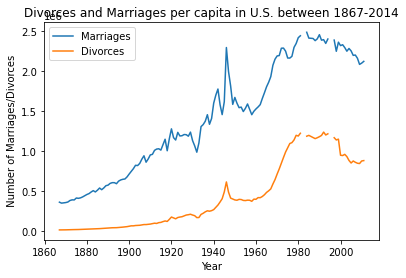

In [73]:
read_data = pd.read_csv(r"C:\Users\16479\Downloads\PS3\us-marriages-divorces-1867-2014.csv")  #reading data from local disk

plt.plot(read_data.Year, read_data['Marriages'], label='Marriages')    #ploting and reading Marriages data
plt.plot(read_data.Year, read_data['Divorces'], label='Divorces')      #ploting and reading Divorces data

plt.title("Divorces and Marriages per capita in U.S. between 1867-2014")    #assigning title, y and x axis label to chart
plt.ylabel(" Number of Marriages/Divorces");
plt.xlabel("Year")

plt.legend();

### Question 7 Python
Create a vertical bar chart comparing the number of marriages and divorces per capita in the U.S. between 1900, 1950, and 2000. Don't forget to label your axes!

Text(0, 0.5, 'Number of Marriages & Divorces')

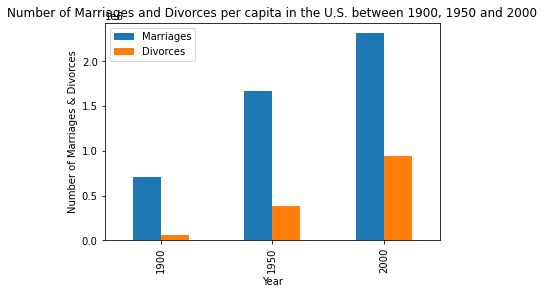

In [74]:
graph = read_data[read_data['Year'].isin(['1900','1950','2000'])]    #reading data of the year 1900, 1950 and 2000
b_graph = graph.plot(x = "Year", y = ["Marriages", "Divorces"], kind="bar")

b_graph.set_title('Number of Marriages and Divorces per capita in the U.S. between 1900, 1950 and 2000')
plt.xlabel('Year')
plt.ylabel('Number of Marriages & Divorces')           #labelling graph with x and y label

### Question 8 Python
Create a horizontal bar chart that compares the deadliest actors in Hollywood. Sort the actors by their kill count and label each bar with the corresponding actor's name. Don't forget to label your axes!

In [76]:
#importing packages
import pandas as pd
import matplotlib.pyplot as plt


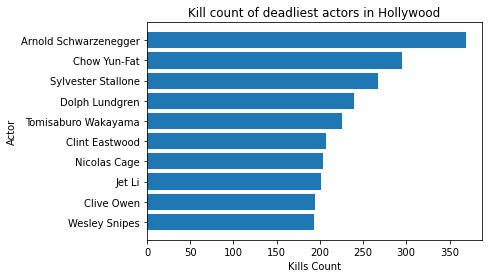

In [77]:
kill_data = pd.read_csv(r"C:\Users\16479\Downloads\PS3\actor_kill_counts.csv")   #reading actor kill counts file from local disk
kill_data = kill_data.sort_values('Count')

plt.barh(kill_data["Actor"], kill_data.Count)

#printing title
plt.title('Kill count of deadliest actors in Hollywood')

#labelling x and y axis
plt.xlabel('Kills Count')
plt.ylabel('Actor')


plt.show()

### Question 9 Python
Create a pie chart showing the fraction of all Roman Emperors that were
assassinated.
Make sure that the pie chart is an even circle, labels the categories, and shows the
percentage breakdown of the categories.

In [78]:
#importing libraries
import pandas as pd
import matplotlib.pyplot as plt

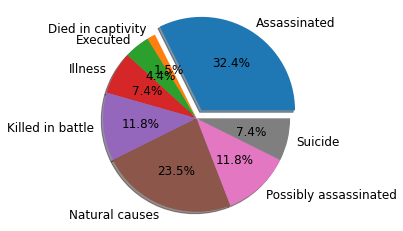

In [79]:
#reading data from local disk
roman_data = pd.read_csv(r"C:\Users\16479\Downloads\PS3\roman-emperor-reigns.csv")
roman= pd.DataFrame({'count' : roman_data.groupby("Cause_of_Death" ).size()}).reset_index() 
labels = roman['Cause_of_Death'].values
sizes = roman['count'].values
x=0.0
y=0.1
explode=[y if item=='Assassinated' else x for item in labels ]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',shadow=True, startangle=0, textprops={'fontsize':12})
ax1.axis('equal')  
plt.show()

### Question 10 Python
Create a scatter plot showing the relationship between the total revenue earned by arcades and the number of Computer Science PhDs awarded in the U.S. between 2000 and 2009. Don't forget to label your axes! Color each dot according to its year.

In [80]:
#importing packages
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Total Arcade Revenue and Computer Science Doctorates Awarded (US) between 2000 and 2009.\n')

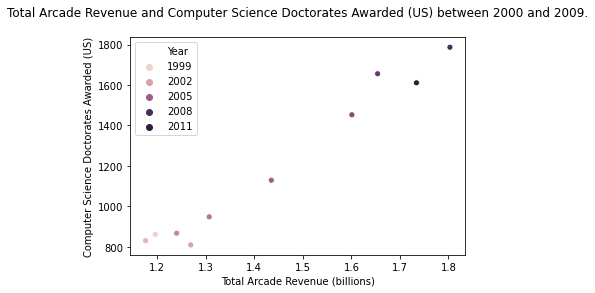

In [81]:
roman_data = pd.read_csv(r"C:\Users\16479\Downloads\PS3\arcade-revenue-vs-cs-doctorates.csv")

sns.scatterplot(x='Total Arcade Revenue (billions)', 
                y='Computer Science Doctorates Awarded (US)', 
                hue='Year', 
                data=roman_data).set_title('Total Arcade Revenue and Computer Science Doctorates Awarded (US) between 2000 and 2009.\n')